In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Data Source - https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#


In [ ]:
# https://colab.research.google.com/github/sudo-ken/compress-decompress-in-Google-Drive/blob/master/Unrar_Unzip_Rar_Zip_in_GDrive.ipynb#scrollTo=o1PFiGyMAMvg
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'

--2022-03-18 17:46:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.02s   

2022-03-18 17:46:24 (3.57 MB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]



In [ ]:
!unzip '/content/sentiment labelled sentences.zip' -d '/content/drive/MyDrive/Colab Notebooks/'

Archive:  /content/sentiment labelled sentences.zip
   creating: /content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/
  inflating: /content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/
   creating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/sentiment labelled sentences/
  inflating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: /content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: /content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/imdb_labelled.txt  
  inflating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: /content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/readme.txt  
  inflating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/sentiment labelled sentences/._readme.t

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/imdb_labelled.txt','r') as file:
  for i in range(5):
    print(file.readline()) #Printing first 5 lines of imdb data
  file.close()

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0

Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0

Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0

Very little music or anything to speak of.  	0

The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1



In [ ]:
amazn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/amazon_cells_labelled.txt', 
            names =['text','label'], header=None, delimiter='\t')
amazn_df['source'] = 'amazon'

In [ ]:
amazn_df.head()

,text,label,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


In [ ]:
imdb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/imdb_labelled.txt', 
            names =['text','label'], header=None, delimiter='\t')
imdb_df['source'] = 'imdb'

In [ ]:
imdb_df.head(2)

,text,label,source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb


In [ ]:
yelp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/yelp_labelled.txt', 
            names =['text','label'], header=None, delimiter='\t')
yelp_df['source'] = 'yelp'

In [ ]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
yelp_df.head(2)

,text,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp


#### Storing All Data in CSV Format

In [ ]:
amazn_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/amazon_labelled.csv', index=False)


In [ ]:
imdb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/imdb_labelled.csv', index=False)
yelp_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/yelp_labelled.csv', index=False)


#### Concatenating dataframes

In [ ]:
data = pd.concat([amazn_df, imdb_df, yelp_df], axis=0, ignore_index=True)
data.head(3)

,text,label,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon


In [ ]:
data.tail(3)

,text,label,source
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp
2747,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/Combined_reviews.csv', index=False)

#### Now We can Read Whole Data Directly From CSV File

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment labelled sentences/Combined_reviews.csv')

In [ ]:
print("Number of data points : ",data.shape[0])

Number of data points :  2748


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2748 non-null   object
 1   label   2748 non-null   int64 
 2   source  2748 non-null   object
dtypes: int64(1), object(2)
memory usage: 64.5+ KB


#### Data Doesn't Contain any Null Values

#### How Much Data is Contributed by Each Source

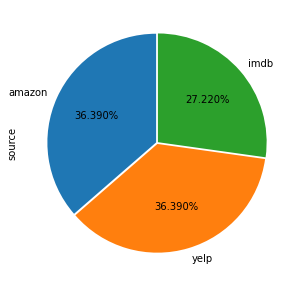

In [ ]:
data['source'].value_counts().plot(
    kind='pie',
    autopct='%1.3f%%',
    explode = [0.01,0.01,0.01],
    startangle=90,
    figsize=(5,5)
)
plt.show()

#### Observation
- Amazon Contributes <b>36.3%</b>
- Imdb Contributes <b>27.2%</b>
- And Yelp Contributes <b>36.3%</b>

#### Contribution of Each Sentiments in Data

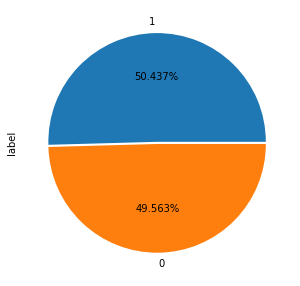

In [ ]:
data['label'].value_counts().plot(
    kind='pie',
    autopct='%1.3f%%',
    explode = [0.01,0.01],
    figsize=(5,5)
)
plt.show()

#### Observation
- Data contains Approx 50% positive and negative sentiments respectively
- <b>1</b> Represents Positive Sentiment
- <b>0</b> Represents Negative Sentiment

In [ ]:
print("~> {} sentiments are positive".format(data['label'].value_counts(normalize=False)[1]))
print("~> {} sentiments are negative".format(data['label'].value_counts(normalize=False)[0]))

~> 1386 sentiments are positive
~> 1362 sentiments are negative


In [ ]:
print ('Maximum number of times a same riview is repeated: {}\n'.format(max(data['text'].value_counts())))

Maximum number of times a same riview is repeated: 2



In [ ]:
reviews = data['text'].values
sentiment = data['label'].values

#### Text Preprocessing

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
# Expanding Contracted Words if there is/are any

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# for Example 27th review from amazon
print(reviews[26])
print('-'*20)
print(decontracted(reviews[26]))

I've owned this phone for 7 months now and can say that it's the best mobile phone I've had.
--------------------
I have owned this phone for 7 months now and can say that it is the best mobile phone I have had.


In [ ]:
# Removing word and numbers
# https://stackoverflow.com/a/18082370/4084039
print(reviews[38])
print('-'*20)
print(re.sub("\S*\d\S*", "", reviews[38]).strip())

The case is great and works fine with the 680.
--------------------
The case is great and works fine with the


In [ ]:
# Removing Special Characters 
# https://stackoverflow.com/a/5843547/4084039
print(reviews[54])
print('-'*20)
print(re.sub('[^A-Za-z0-9]+', ' ', reviews[54]))

I love this thing!
--------------------
I love this thing 


In [ ]:
# Stop Words Removal
nltk.download('stopwords')

print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'yourself', 'below', 'do', 'during', 'any', 'on', 've', 'each', 'after', 'at', 'which', 'until', 'him', 'ours', 'he', 'have', 'me', 'above', 'up', 'then', 'no', 'shan', "you'd", "shouldn't", 'or', 'did', "that'll", 'yourselves', 'more', 'just', 'my', 'this', 'd', 'your', 'itself', 'further', 'll', "couldn't", 'once', 'haven', 'it', 'weren', 'too', 'shouldn', 'does', 'from', "hadn't", 'an', 'same', 'be', 'and', 'can', 'those', 'of', 'while', 't', 'is', 'into', 'hadn', 'are', 'what', 'before', 'had', 'them', 'being', 'not', 'between', "needn't", "it's", 'some', 'other', "weren't", 'herself', 'all', 'now', 'that', 'doesn', 'off', "wasn't", 'her', 'with', 'the', "hasn't", 'our', 'both', "mustn't", 'wouldn', 'themselves', 'a', 'i', 'if', 'were', 'so', "isn't", 'y', "mightn't", 'won', "don't", 'who', 'their', 'to', "doesn't", 'doing', 'o', 'you', 'his', 'yours', 'few', 'mig

In [ ]:
# Combining all the above Steps in one
from tqdm import tqdm
preprocessed_reviews = []
for sentence in tqdm(reviews):
  sentence = decontracted(sentence)
  sentence = re.sub("\S*\d\S*", "", sentence).strip()
  sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
  sentence = ' '.join(word.lower() for word in sentence.split() if word.lower() not in stopwords)
  preprocessed_reviews.append(sentence.strip())

100%|██████████| 2748/2748 [00:00<00:00, 6527.99it/s]


In [ ]:
preprocessed_reviews[8]

'needless say wasted money'

#### Creating Training and Testing Data


In [ ]:
train_sent, test_sent, y_train, y_test = train_test_split(preprocessed_reviews, sentiment, test_size=0.2,
                                                          shuffle=True, stratify=sentiment)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1089, 1109]))

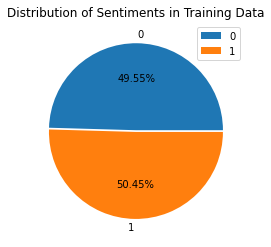

In [ ]:
plt.pie(np.unique(y_train, return_counts=True)[1], autopct='%.2f%%', explode=(0.01,0.01),
                      labels=[0,1]  )
plt.legend()
plt.title('Distribution of Sentiments in Training Data')
plt.show()

#### Function for Plotting Confusion Matrix and ROC-curve

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    plt.figure(figsize=(8,6))
    
    labels = [0,1]
    cmap=sns.light_palette("blue")
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

In [ ]:
def plot_roc(clf, train_x, train_y, test_x, test_y):
  # For Testing
  y_pred_proba_test = clf.predict_proba(test_x)[::,1]
  fpr_test, tpr_test, _ = roc_curve(test_y,  y_pred_proba_test)
  auc_test = roc_auc_score(test_y, y_pred_proba_test)

  # For Training
  y_pred_proba_train = clf.predict_proba(train_x)[::,1]
  fpr_train, tpr_train, _ = roc_curve(train_y,  y_pred_proba_train)
  auc_train = roc_auc_score(train_y, y_pred_proba_train)

  #create ROC curve
  plt.plot(fpr_test, tpr_test,label="AUC_Test="+str(auc_test))
  plt.plot(fpr_train, tpr_train,label="AUC_Train="+str(auc_train))
  plt.plot([0, 1], [0, 1],'r--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

### Featurization

- BoW

In [ ]:
count_vect = CountVectorizer(max_features=500)
count_vect_train = count_vect.fit_transform(train_sent)
count_vect_test = count_vect.transform(test_sent)

print("Train Size BoW ~> ", count_vect_train.shape)
print("Test Size BoW ~> ", count_vect_test.shape)

Train Size BoW ~>  (2198, 500)
Test Size BoW ~>  (550, 500)


In [ ]:
logreg = LogisticRegression()
logreg.fit(count_vect_train, y_train)

LogisticRegression()

In [ ]:
print('Training Accuracy Score ~>',accuracy_score(y_train,logreg.predict(count_vect_train)))
print('Testing Accuracy Score ~>',accuracy_score(y_test,logreg.predict(count_vect_test)))

Training Accuracy Score ~> 0.8685168334849863
Testing Accuracy Score ~> 0.7745454545454545


0.7802400900893889

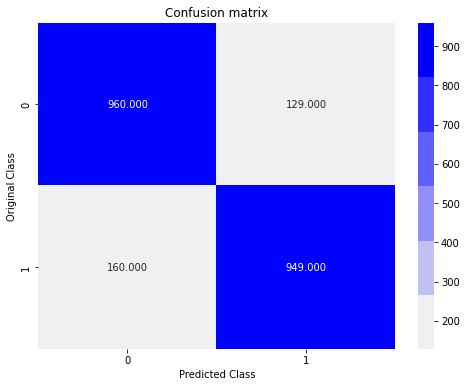

In [ ]:
plot_confusion_matrix(y_train, logreg.predict(count_vect_train))

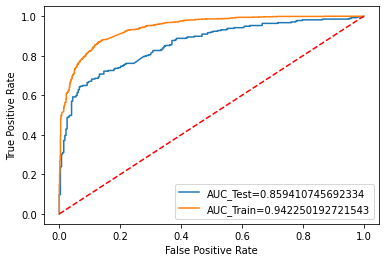

In [ ]:
plot_roc(logreg, count_vect_train, y_train, count_vect_test, y_test)

In [ ]:
count_vect_1000 = CountVectorizer(max_features=1000, ngram_range=(1,2))
count_vect_train_1000 = count_vect_1000.fit_transform(train_sent)
count_vect_test_1000 = count_vect_1000.transform(test_sent)

print("Train Size BoW ~> ", count_vect_train_1000.shape)
print("Test Size BoW ~> ", count_vect_test_1000.shape)

logreg_1000 = LogisticRegression()
logreg_1000.fit(count_vect_train_1000, y_train)

print('Training Accuracy Score ~>',accuracy_score(y_train,logreg_1000.predict(count_vect_train_1000)))
print('Testing Accuracy Score ~>',accuracy_score(y_test,logreg_1000.predict(count_vect_test_1000)))

Train Size BoW ~>  (2198, 1000)
Test Size BoW ~>  (550, 1000)
Training Accuracy Score ~> 0.9126478616924477
Testing Accuracy Score ~> 0.8018181818181818


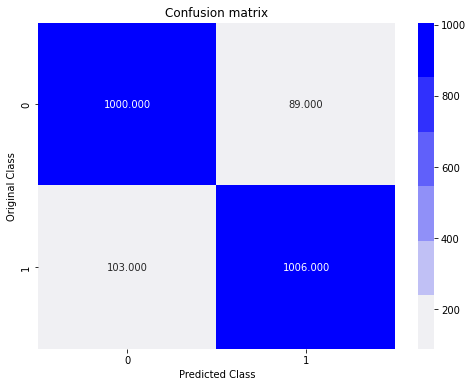

In [ ]:
plot_confusion_matrix(y_train, logreg_1000.predict(count_vect_train_1000))

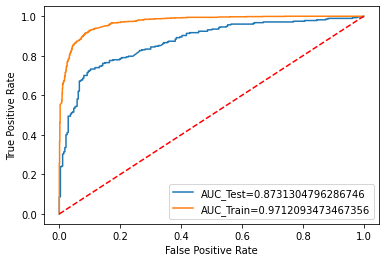

In [ ]:
plot_roc(logreg_1000, count_vect_train_1000, y_train, count_vect_test_1000, y_test)

#### Classifier
- SVM on uni and bigram features

In [ ]:
svm_clf = svm.SVC(probability=True)
svm_clf.fit(count_vect_train_1000, y_train)

print('Training Accuracy Score SVM ~>',accuracy_score(y_train,svm_clf.predict(count_vect_train_1000)))
print('Testing Accuracy Score SVM ~>',accuracy_score(y_test,svm_clf.predict(count_vect_test_1000)))


Training Accuracy Score SVM ~> 0.9322111010009099
Testing Accuracy Score SVM ~> 0.8145454545454546


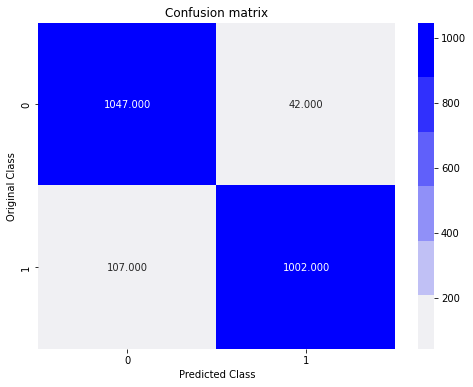

In [ ]:
plot_confusion_matrix(y_train, svm_clf.predict(count_vect_train_1000))

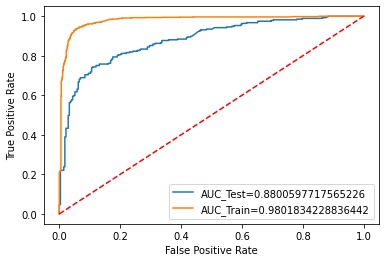

In [ ]:
plot_roc(svm_clf, count_vect_train_1000, y_train, count_vect_test_1000, y_test)

#### Featurization
- Tf-Idf

In [ ]:
tf_vect= TfidfVectorizer(max_features=500)
tf_vect_train = tf_vect.fit_transform(train_sent)
tf_vect_test = tf_vect.transform(test_sent)

In [ ]:
logreg_tf = LogisticRegression()
logreg_tf.fit(tf_vect_train, y_train)

print('Training Accuracy Score ~>',accuracy_score(y_train,logreg_tf.predict(tf_vect_train)))
print('Testing Accuracy Score ~>',accuracy_score(y_test,logreg_tf.predict(tf_vect_test)))

Training Accuracy Score ~> 0.8516833484986351
Testing Accuracy Score ~> 0.7818181818181819


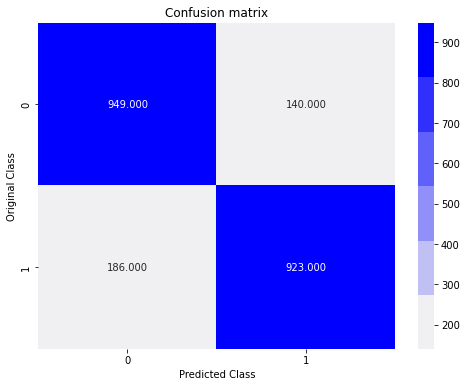

In [ ]:
plot_confusion_matrix(y_train, logreg_tf.predict(tf_vect_train))


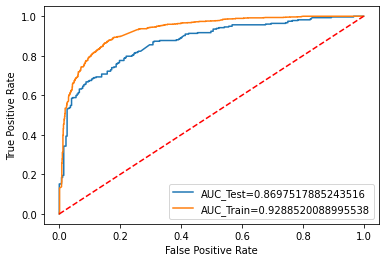

In [ ]:
plot_roc(logreg_tf, tf_vect_train, y_train, tf_vect_test, y_test)

In [ ]:
tf_vect_1000= TfidfVectorizer(max_features=1000, ngram_range=(1,2))
tf_vect_train_1000 = tf_vect_1000.fit_transform(train_sent)
tf_vect_test_1000 = tf_vect_1000.transform(test_sent)

tf_logreg_1000 = LogisticRegression()
tf_logreg_1000.fit(tf_vect_train_1000, y_train)

print('Training Accuracy Score ~>',accuracy_score(y_train,tf_logreg_1000.predict(tf_vect_train_1000)))
print('Testing Accuracy Score ~>',accuracy_score(y_test,tf_logreg_1000.predict(tf_vect_test_1000)))

Training Accuracy Score ~> 0.8953594176524113
Testing Accuracy Score ~> 0.8018181818181818


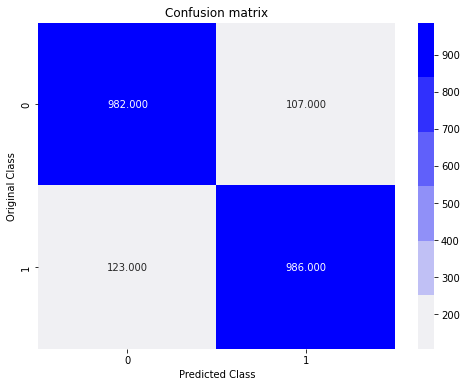

In [ ]:
plot_confusion_matrix(y_train, tf_logreg_1000.predict(tf_vect_train_1000))


In [ ]:
svm_clf_tf = svm.SVC(probability=True)
svm_clf_tf.fit(tf_vect_train_1000, y_train)

print('Training Accuracy Score SVM ~>',accuracy_score(y_train, svm_clf_tf.predict(tf_vect_train_1000)))
print('Testing Accuracy Score SVM ~>',accuracy_score(y_test, svm_clf_tf.predict(tf_vect_test_1000)))


Training Accuracy Score SVM ~> 0.9663330300272975
Testing Accuracy Score SVM ~> 0.8181818181818182


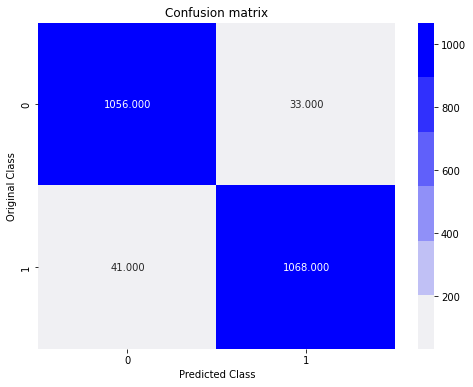

In [ ]:
plot_confusion_matrix(y_train,svm_clf_tf.predict(tf_vect_train_1000))

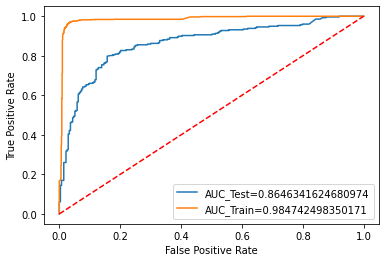

In [ ]:
plot_roc(svm_clf_tf, tf_vect_train_1000, y_train, tf_vect_test_1000, y_test)

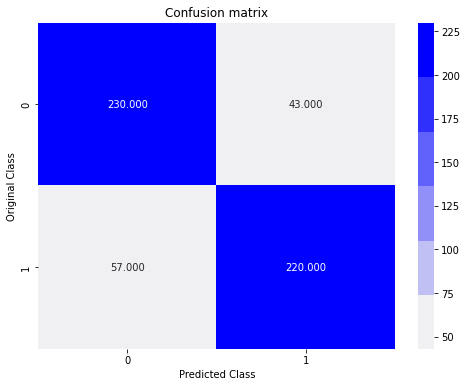

In [ ]:
plot_confusion_matrix(y_test,svm_clf_tf.predict(tf_vect_test_1000))

#### Observations 
- BoW and TfIdf based features are having similar result for Logistic Regression
  - For 1 gram based features
- For 1 gram and bi-gram based 1000 features, SVM is having better result than Logistic Regression
  - But SVM is overfitting on TfIdf based 1000 features

### Next Steps
- Hyperparameter Tuning of SVM and Logistic Regression
  - Train SGDClassifier with different sets of alpha for **logloss** and **hingeloss** 